## 6.2 Exploring the variables & relations

#### 1. Importing Visualization Libraries and Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.9.2'

In [3]:
%matplotlib inline

In [4]:
#Define Path
path = r'C:\Users\danac\Downloads\Achievement 6\Data\Cleaned Data\cleaned_data.xlsx'

In [9]:
#Importing Data
dataframe = pd.read_excel(path)

#### 2. Exploring the variables

##### Correlations

In [13]:
subset = dataframe.drop(columns=['country', 'year','institution'])

In [28]:
# Create a correlation matrix using pandas
subset.corr()

world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238553              0.676166   
national_rank           0.238553       1.000000              0.211975   
quality_of_education    0.676166       0.211975              1.000000   
alumni_employment       0.668529       0.135342              0.606421   
quality_of_faculty      0.663864       0.222833              0.786181   
publications            0.923037       0.326857              0.624657   
influence               0.895871       0.161086              0.645641   
citations               0.856573       0.186797              0.630455   
broad_impact            0.853395       0.170518              0.436278   
patents                 0.698214       0.159440              0.528120   
score                  -0.549098      -0.199756             -0.600541   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.668529            0.663864      0.923037   
national_rank                  0.135342            0.222833      0.326857   
quality_of_education           0.606421            0.786181      0.624657   
alumni_employment              1.000000            0.558618      0.572096   
quality_of_faculty             0.558618            1.000000      0.634423   
publications                   0.572096            0.634423      1.000000   
influence                      0.527382            0.656406      0.874952   
citations                      0.559200            0.652186      0.829912   
broad_impact                   0.372017            0.428960      0.831990   
patents                        0.528219            0.555107      0.671558   
score                         -0.510374           -0.693540     -0.522111   

                      influence  citations  broad_impact   patents     score  
world_rank             0.895871   0.856573      0.853395  0.698214 -0.549098  
national_rank          0.161086   0.186797      0.170518  0.159440 -0.199756  
quality_of_education   0.645641   0.630455      0.436278  0.528120 -0.600541  
alumni_employment      0.527382   0.559200      0.372017  0.528219 -0.510374  
quality_of_faculty     0.656406   0.652186      0.428960  0.555107 -0.693540  
publications           0.874952   0.829912      0.831990  0.671558 -0.522111  
influence              1.000000   0.845207      0.830433  0.611811 -0.522837  
citations              0.845207   1.000000      0.769512  0.598728 -0.522438  
broad_impact           0.830433   0.769512      1.000000  0.508821 -0.430626  
patents                0.611811   0.598728      0.508821  1.000000 -0.474810  
score                 -0.522837  -0.522438     -0.430626 -0.474810  1.000000

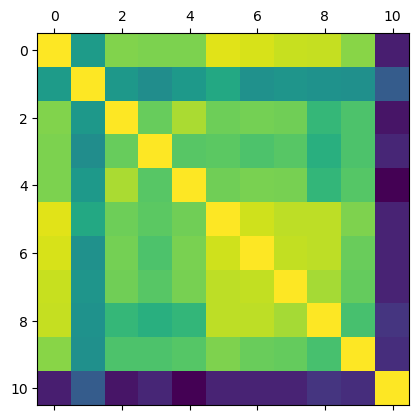

In [32]:
#Heat map
plt.matshow(subset.corr())
plt.show()

In [40]:
#Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Text(0.5, 1.0, 'Correlation Matrix')

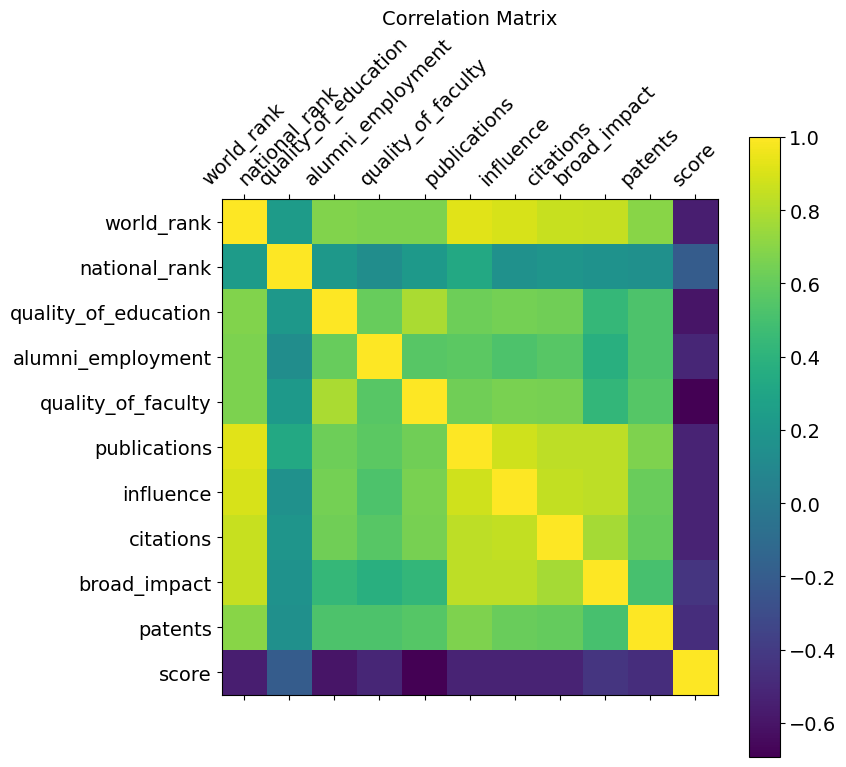

In [42]:
f

##### Create a correlation heatmap using seaborn

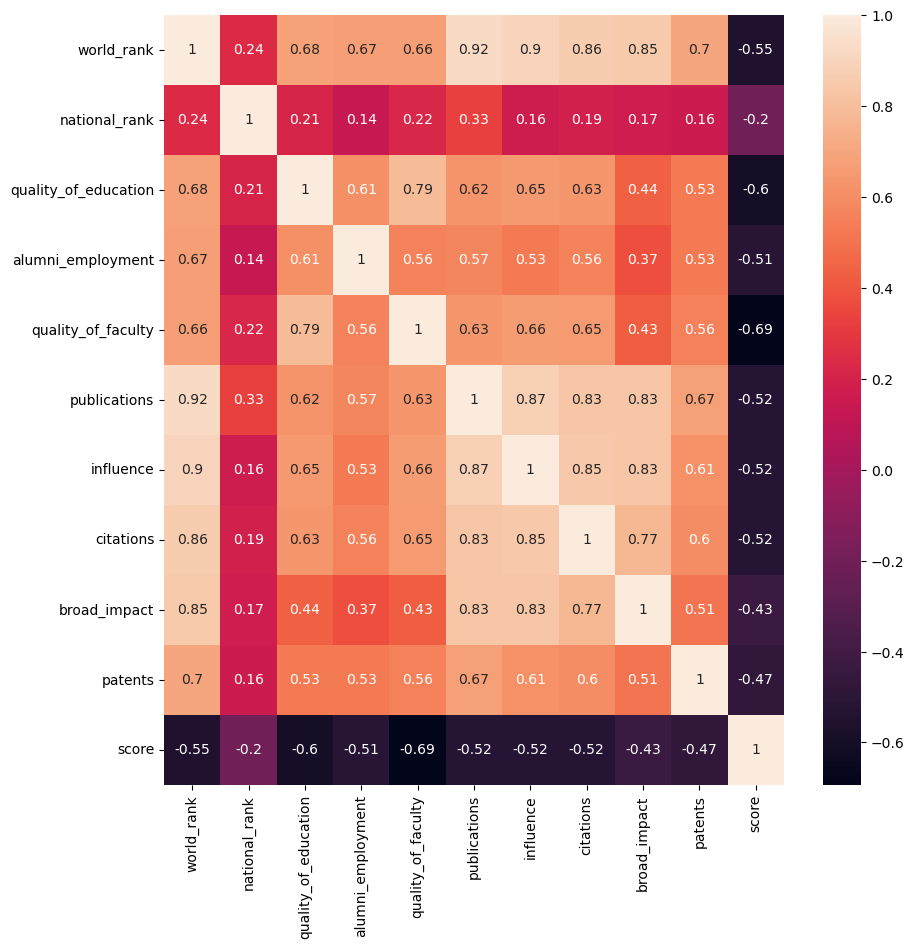

In [63]:
#Create a subplot with matplotlib
%matplotlib inline
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.show(1)

#### Scatter plot

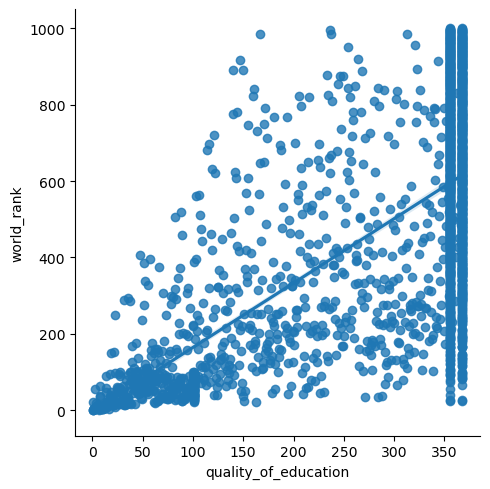

In [71]:
# Create a scatterplot 

sns.lmplot(x = 'quality_of_education', y = 'world_rank', data = subset)
plt.show(0)

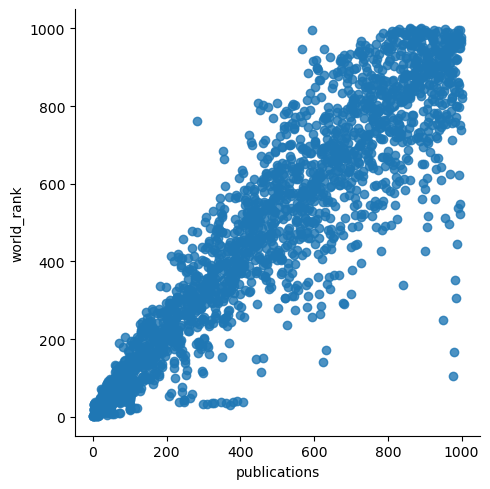

In [15]:
# Create a scatterplot 

sns.lmplot(x = 'publications', y = 'world_rank', data = subset)
plt.show(0)

##### Pair plot of the whole data set 

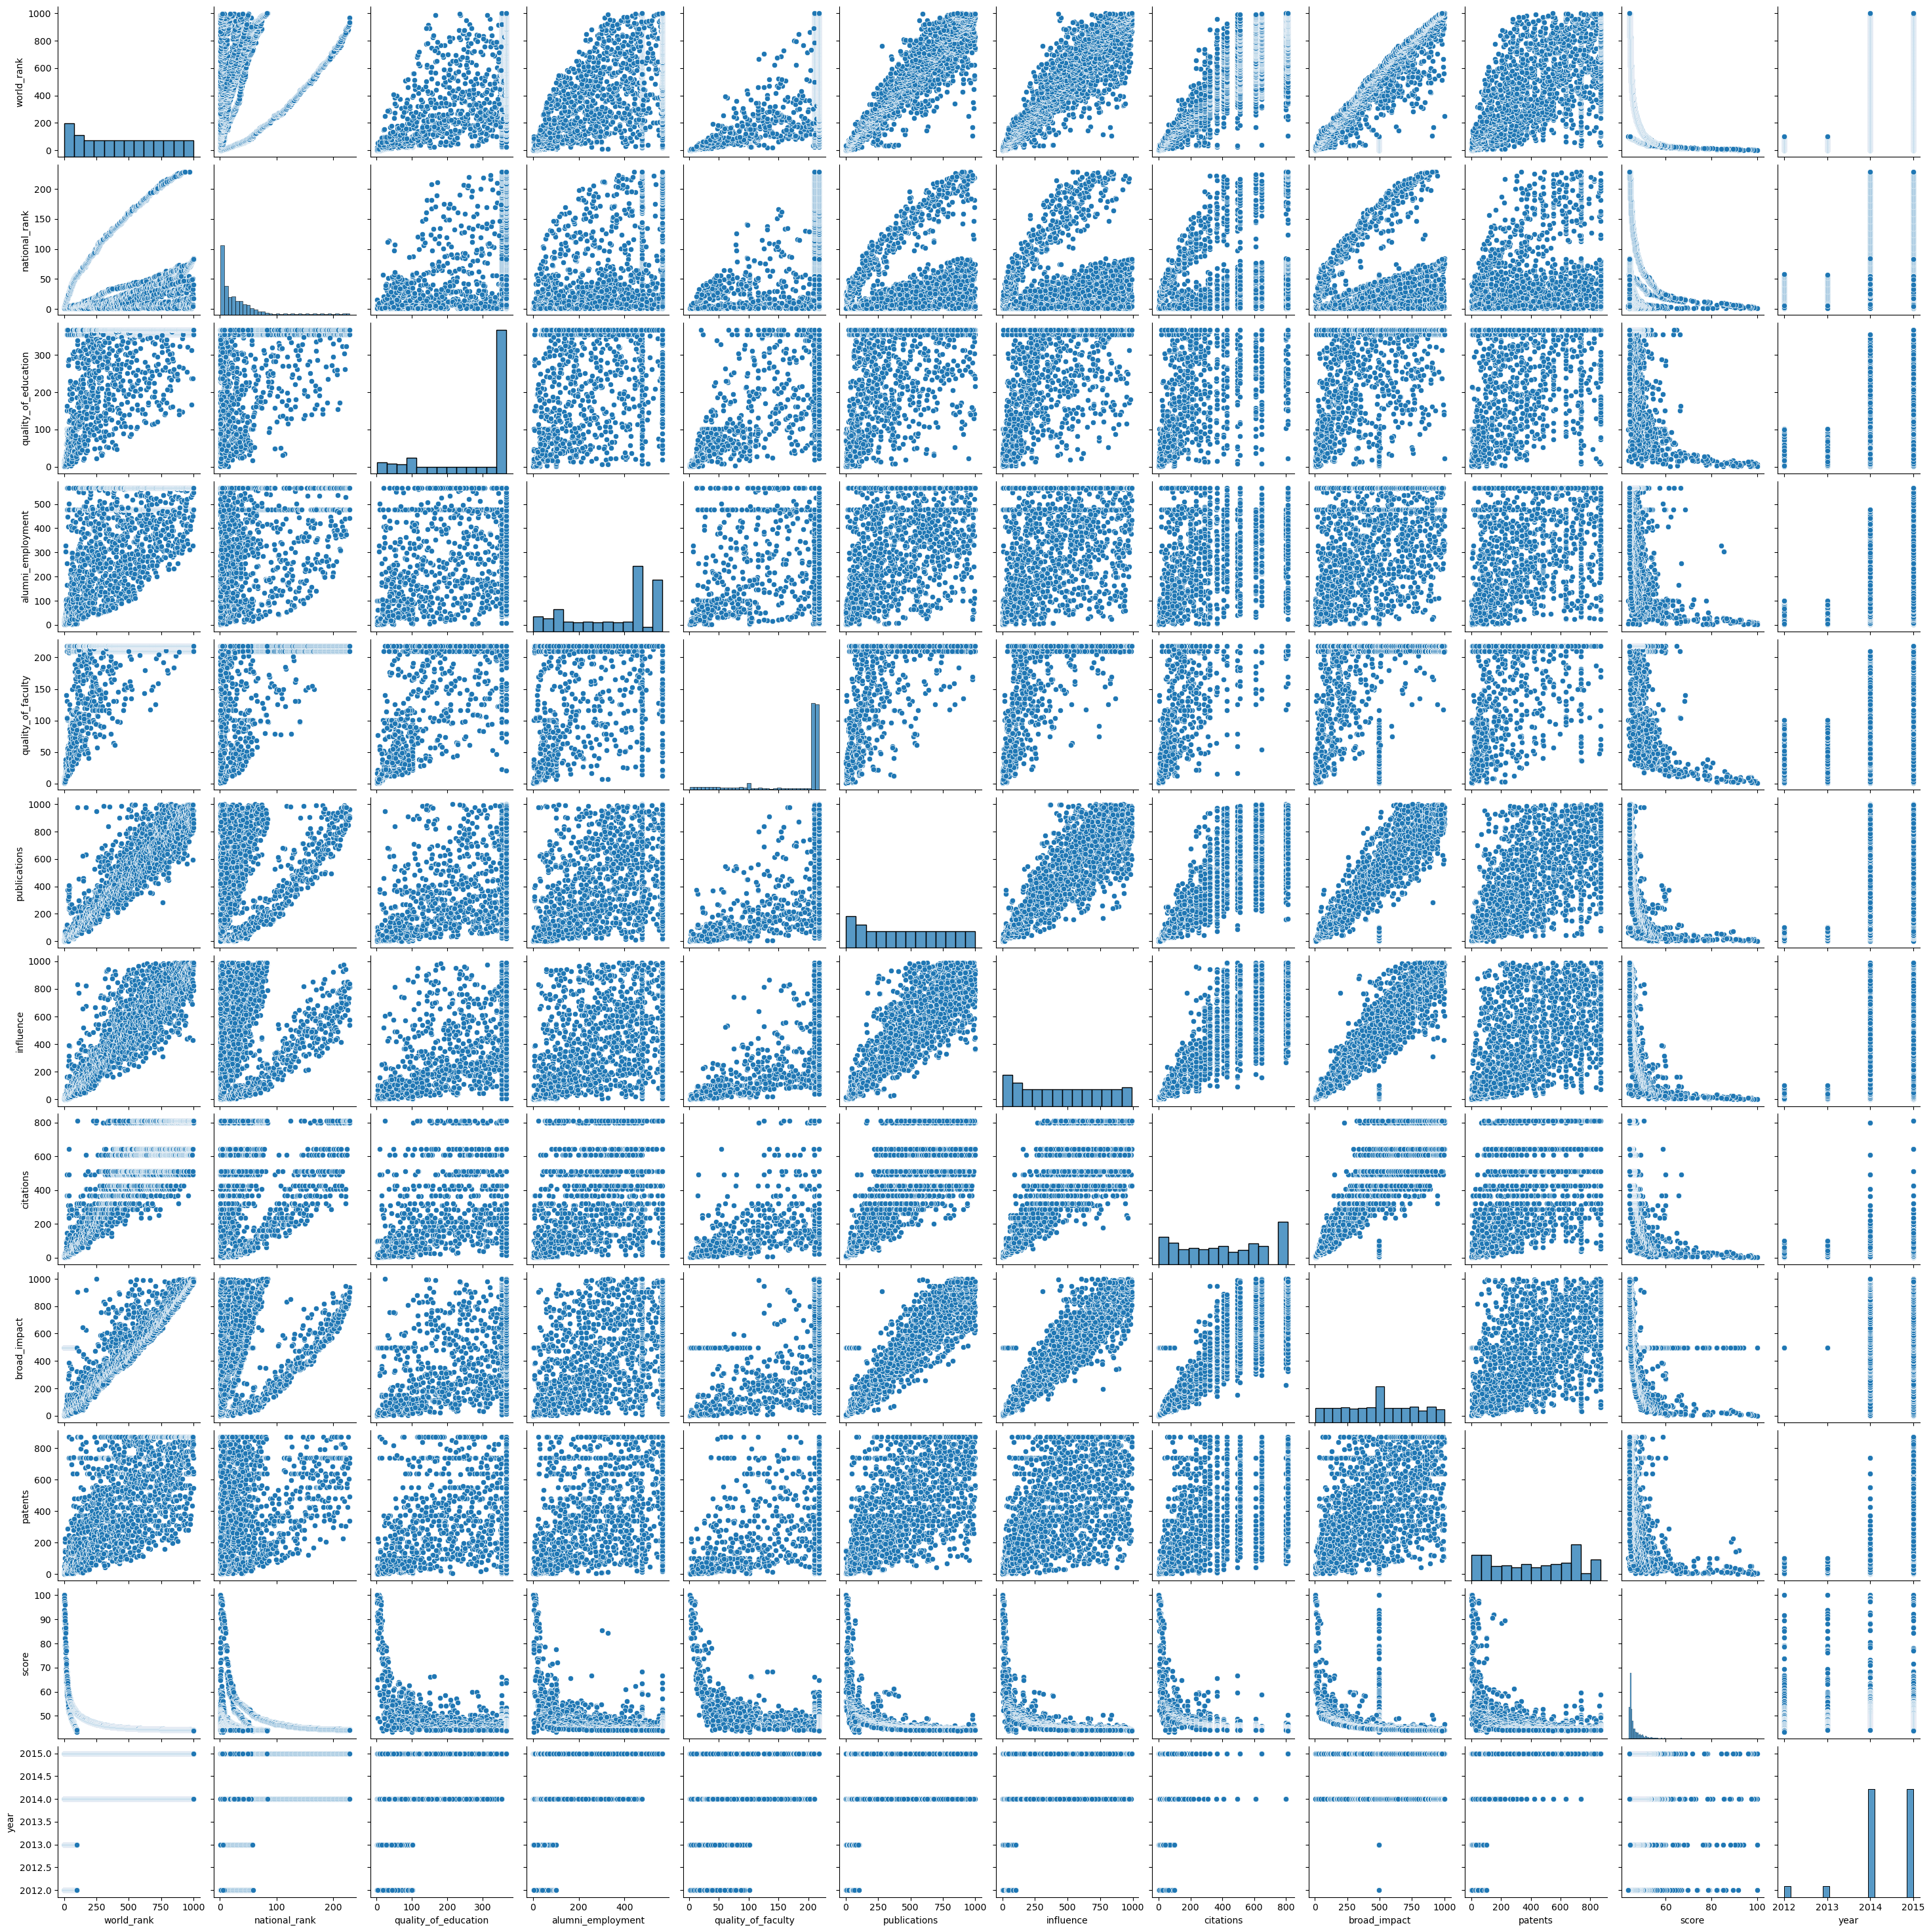

In [80]:
g = sns.pairplot(dataframe)
plt.show(1)

#### Categorical plot Analisyng Score & Wordl Rank

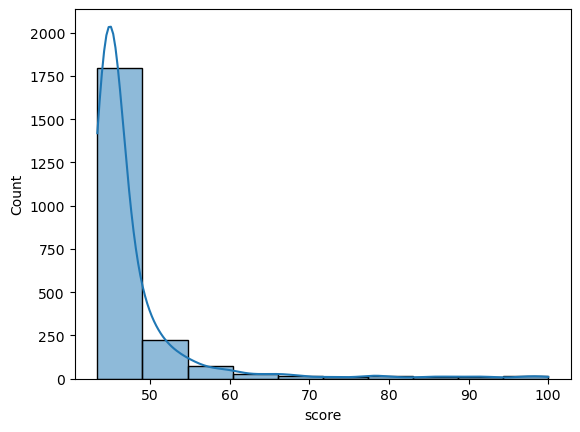

In [101]:
#Use a histogram to visualize the distribution of the Score
sns.histplot(subset['score'], bins = 10, kde = True)
plt.show()

In [91]:
#Creating categories for Scores
subset.loc[subset['score'] < 40, 'Score Category'] = 'Low score'
subset.loc[(subset['score'] >= 40) & (subset['score'] < 70), 'Score Category'] = 'Middle score'
subset.loc[subset['score'] >= 70, 'Score Category'] = 'High score'

C:\Users\danac\AppData\Local\Temp\ipykernel_15116\1822830178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='Score Category', y='world_rank', palette='coolwarm')


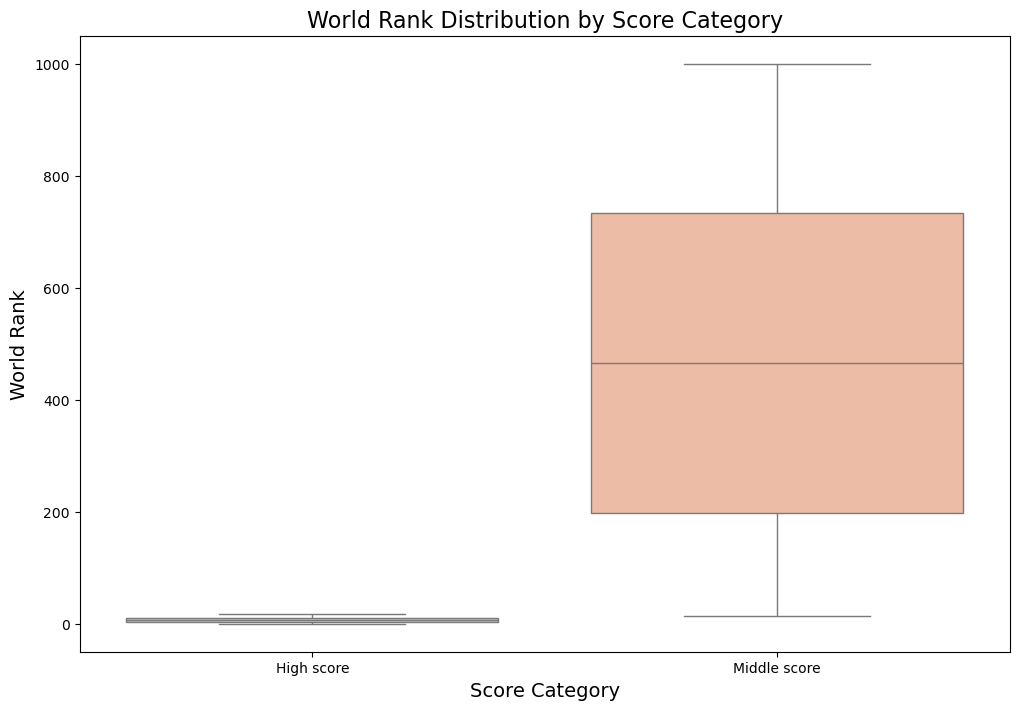

In [105]:
#Relating Score distribution with World Rank 
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset, x='Score Category', y='world_rank', palette='coolwarm')
plt.title('World Rank Distribution by Score Category', fontsize=16)
plt.xlabel('Score Category', fontsize=14)
plt.ylabel('World Rank', fontsize=14)
plt.show()